In [21]:
from sklearn.datasets import load_breast_cancer

In [22]:
kanser = load_breast_cancer()

In [23]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(kanser.data, kanser.target,
                                                    stratify=kanser.target, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logreg = LogisticRegression(solver = 'liblinear').fit(x_train, y_train)

In [40]:
print(logreg.score(x_train, y_train))
print(logreg.score(x_test,y_test))


0.9553990610328639
0.958041958041958


In [41]:
logreg100 = LogisticRegression(C=100,solver = 'liblinear').fit(x_train, y_train)

In [42]:
print(logreg100.score(x_train, y_train))
print(logreg100.score(x_test,y_test))

0.971830985915493
0.965034965034965


In [44]:
logreg1000 = LogisticRegression(C=0.01,solver = 'liblinear').fit(x_train, y_train)
print(logreg1000.score(x_train, y_train))
print(logreg1000.score(x_test,y_test))

0.9342723004694836
0.9300699300699301


In [49]:
for C, market in zip([0.001,1,100],['o','^', 'v']):
    lr_l1 = LogisticRegression(penalty = 'l1', max_iter=1000, solver='liblinear', C=C).fit(x_train,y_train)
    print('C={:.3f} için eğitim doğruluk {:.2f}'.format(C,lr_l1.score(x_train,y_train)))
    print('C={:.3f} için test doğruluk {:.2f}'.format(C,lr_l1.score(x_test,y_test)))


C=0.001 için eğitim doğruluk 0.91
C=0.001 için test doğruluk 0.92
C=1.000 için eğitim doğruluk 0.96
C=1.000 için test doğruluk 0.96
C=100.000 için eğitim doğruluk 0.99
C=100.000 için test doğruluk 0.98


# ÇOKLU SINIFLANDIRMA

In [50]:
from sklearn.datasets import make_blobs
import mglearn


# Çizdirilecek grafikleri satır arasında görmek için %matplotlib inline

In [51]:
%matplotlib inline

# Verisetindeki girdi ve çıktıları 'x' ve 'y' değişkenlerine atıyoruz.

In [52]:
x, y = make_blobs(random_state = 42)

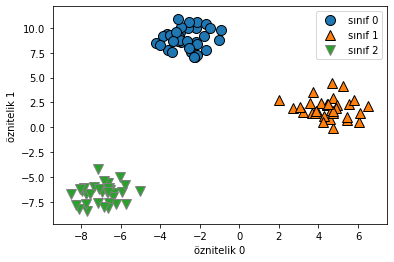

In [56]:
import matplotlib.pyplot as plt 
mglearn.discrete_scatter(x[:,0],x[:,1],y)#x verisindeki 0. index sütunu ve 1. index sütunu yazdılır.
plt.xlabel('öznitelik 0')
plt.ylabel('öznitelik 1')
plt.legend(['sınıf 0','sınıf 1','sınıf 2'])

In [57]:
from sklearn.svm import LinearSVC

In [58]:
linear_svm = LinearSVC().fit(x,y)

In [59]:
linear_svm.coef_

array([[-0.17492014,  0.23140529],
       [ 0.47621615, -0.06936488],
       [-0.18914454, -0.20399749]])

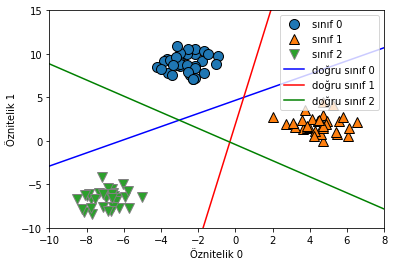

In [62]:
import numpy as np
mglearn.discrete_scatter(x[:,0],x[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip (linear_svm.coef_, linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
    
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('Öznitelik 0')
plt.ylabel('Öznitelik 1')
plt.legend(['sınıf 0','sınıf 1','sınıf 2', 'doğru sınıf 0','doğru sınıf 1','doğru sınıf 2'], loc = (1))